## Importando as bibliotecas necessarias

In [1]:
# importando bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt 

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\luiza\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\luiza\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\luiza\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luiza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Carregando os dados de treinamento

In [2]:
df_train = pd.read_csv('IMDB_train.csv')

#### Mostrando as 10 primeiras linhas

In [3]:
df_train.head(10)

,class,text
0,Pos,a common complaint amongst film critics is ...
1,Pos,whew this film oozes energy the kind of b...
2,Pos,steven spielberg s amistad which is bas...
3,Pos,he has spent his entire life in an awful litt...
4,Pos,being that it is a foreign language film with...
5,Pos,when i first heard of contact the hype was ...
6,Pos,you ve got to love disney no matter what t...
7,Pos,with three pre to mid teen children and an a...
8,Pos,i hate to burst your bubble but after all t...
9,Pos,susan granger s review of osmosis jones ...


In [4]:
# print data(feature)shape
df_train.shape

(1600, 2)

#### Mostrando o nome das colunas

In [5]:
df_train.columns

Index(['class', 'text'], dtype='object')

#### Renomeando o nome das colunas

In [6]:
df_train = df_train.rename(columns={'class': 'tipo', 'text': 'critica'})

#### Transformando o target "tipo" para 0 - Neg e 1 - Pos

In [7]:
# Importação de LabelEncoder
from sklearn import preprocessing

# criando labelEncoder
le = preprocessing.LabelEncoder()

df_train['tipo']=le.fit_transform(df_train.tipo)
df_train.head()

,tipo,critica
0,1,a common complaint amongst film critics is ...
1,1,whew this film oozes energy the kind of b...
2,1,steven spielberg s amistad which is bas...
3,1,he has spent his entire life in an awful litt...
4,1,being that it is a foreign language film with...


#### Mostrando as últimas linhas

In [8]:
df_train.tail()

,tipo,critica
1595,0,if anything stigmata should be taken as...
1596,0,john boorman s zardoz is a goofy cinemati...
1597,0,the kids in the hall are an acquired taste ...
1598,0,there was a time when john carpenter was a gr...
1599,0,two party guys bob their heads to haddaway s ...


#### Verifica se estao faltando valores

In [9]:
df_train.isna().sum()

tipo       0
critica    0
dtype: int64

#### Verificar se a quantidade de dados do target (tipo da critica) esta balanceada

1    800
0    800
Name: tipo, dtype: int64


<AxesSubplot: ylabel='tipo'>

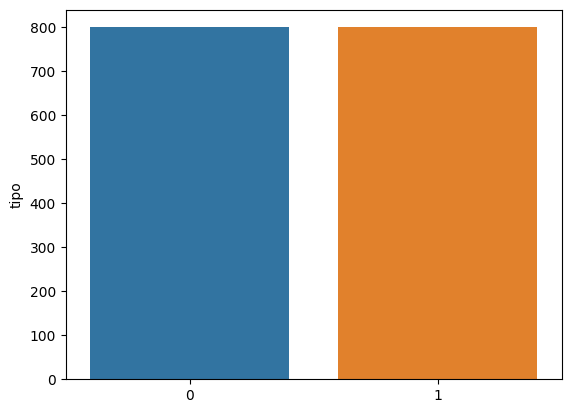

In [10]:
tipo_count = df_train['tipo'].value_counts()
print(tipo_count)
sns.barplot(x=tipo_count.index, y=tipo_count)

#### Mostrando como as variáveis ficaram após as transformações

In [11]:
critica, tipo = df_train.critica, df_train.tipo

In [12]:
print(critica)
print(tipo)

0        a common complaint amongst film critics is   ...
1        whew   this film oozes energy   the kind of b...
2        steven spielberg s   amistad     which is bas...
3        he has spent his entire life in an awful litt...
4        being that it is a foreign language film with...
                              ...                        
1595     if anything     stigmata   should be taken as...
1596     john boorman s   zardoz   is a goofy cinemati...
1597     the kids in the hall are an acquired taste   ...
1598     there was a time when john carpenter was a gr...
1599     two party guys bob their heads to haddaway s ...
Name: critica, Length: 1600, dtype: object
0       1
1       1
2       1
3       1
4       1
       ..
1595    0
1596    0
1597    0
1598    0
1599    0
Name: tipo, Length: 1600, dtype: int32


#### Funções de pré-processamento para retirar simbolos, pontuações e palavras desnecessárias

In [13]:
from string import punctuation

# eliminar palavras e simbolos desnecessários
def token(string):
    words = nltk.word_tokenize(string)
    return ' '.join(words)

# remover pontuação
def Remove_stopwords(string):
    for i in punctuation:
        string = string.replace(i, '')
    separated_words=nltk.word_tokenize(string)
    
    clean_words = []
    stop = stopwords.words('english')
    for each in separated_words:
        if each not in stop:
            clean_words.append(each.lower())
    return ' '.join(clean_words)

# retirar palavras desnecessárias
def Remove_words(string):
    words = nltk.word_tokenize(string)
    wnl = WordNetLemmatizer()
    new_word = []
    for each in words:
        new_word.append(wnl.lemmatize(each))
    return ' '.join(new_word)

# tokenização
def final_preprocess(string):
    return Remove_words(Remove_stopwords(token(string)))

In [14]:
df_train['clean_text'] = df_train['critica'].apply(lambda x: final_preprocess(x))
df_train.head()
df_train['clean_text'].to_csv("final")

#### Pré-processamento dados do dataset de teste

##### Carregando os dados de teste

In [15]:
df_test = pd.read_csv('IMDB_test.csv')

##### Renomeando as colunas

In [16]:
df_test = df_test.rename(columns={'class': 'tipo', 'text': 'critica'})

##### Verificando se há valores nulos

In [17]:
df_test.isna().sum()

tipo       0
critica    0
dtype: int64

##### Verificando a quantidade de dados de cada tipo

Pos    200
Neg    200
Name: tipo, dtype: int64


<AxesSubplot: ylabel='tipo'>

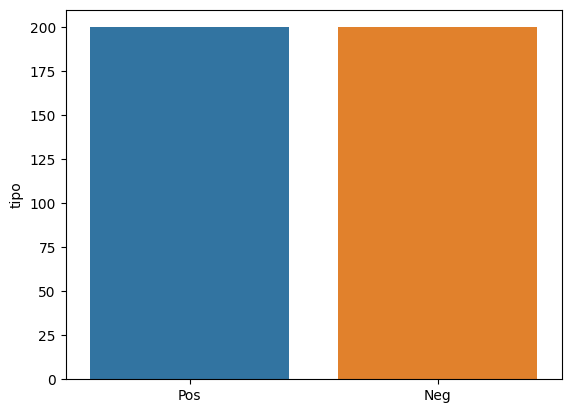

In [18]:
tipo_count = df_test['tipo'].value_counts()
print(tipo_count)
sns.barplot(x=tipo_count.index, y=tipo_count)

##### Pré-processando

In [19]:
df_test['clean_text'] = df_test['critica'].apply(lambda x: final_preprocess(x))
df_test.head()

,tipo,critica,clean_text
0,Pos,films adapted from comic books have had plent...,film adapted comic book plenty success whether...
1,Pos,every now and then a movie comes along from a...,every movie come along suspect studio every in...
2,Pos,you ve got mail works alot better than it des...,got mail work alot better deserves order make ...
3,Pos,jaws is a rare film that grabs your atte...,jaw rare film grab attention show single image...
4,Pos,moviemaking is a lot like being the general m...,moviemaking lot like general manager nfl team ...


### Estatísticas e visualização dos dados

##### Contando o tamanho das criticas

In [20]:
sentence_lengths = [len(tokens) for tokens in df_train["clean_text"]]

#### Distribuição das criticas por quantidade de palavras

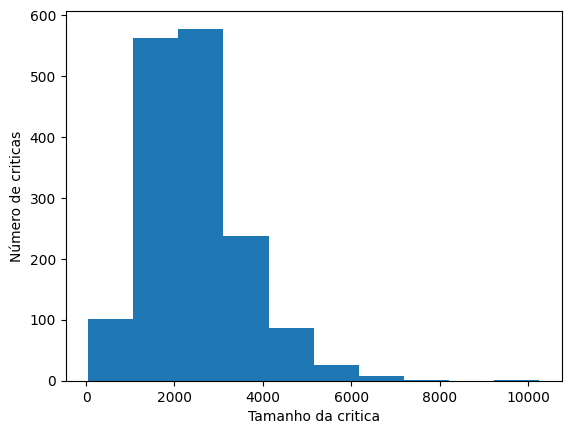

In [21]:
fig = plt.figure() 
plt.xlabel('Tamanho da critica')
plt.ylabel('Número de criticas')
plt.hist(sentence_lengths)
plt.show()

#### Gráfico das 10 palavras mais comuns nas críticas

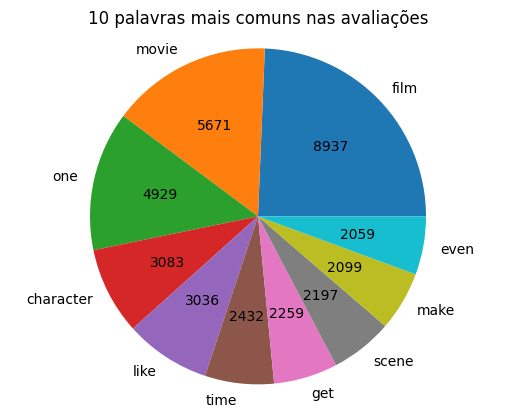

In [63]:
from collections import Counter
Counter(" ".join(df_train["clean_text"]).split()).most_common(10)

labels= 'film', 'movie', 'one', 'character', 'like', 'time', 'get', 'scene', 'make', 'even'
y= [ 8937, 5671, 4929, 3083, 3036, 2432, 2259, 2197, 2099, 2059]

fig1, ax1 = plt.subplots()

ax1.pie(y, labels= labels, autopct= lambda v:f"{sum(y)*v/100:.0f}") 
ax1.set_title("10 palavras mais comuns nas avaliações")
ax1.axis('equal')

plt.show()

#### Treinamento e teste do algoritmo

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_train["clean_text"],df_train["tipo"],test_size=0.2,shuffle=True)